<a href="https://colab.research.google.com/github/cristiang26/Variabilidad_de_la_Frecuencia_Cardiaca_-HRV-/blob/main/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
!pip install wfdb   #Instalacion en colab
import wfdb
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 78.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.3 which is incompatible.


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dimensiones del archivo: (500000, 2)


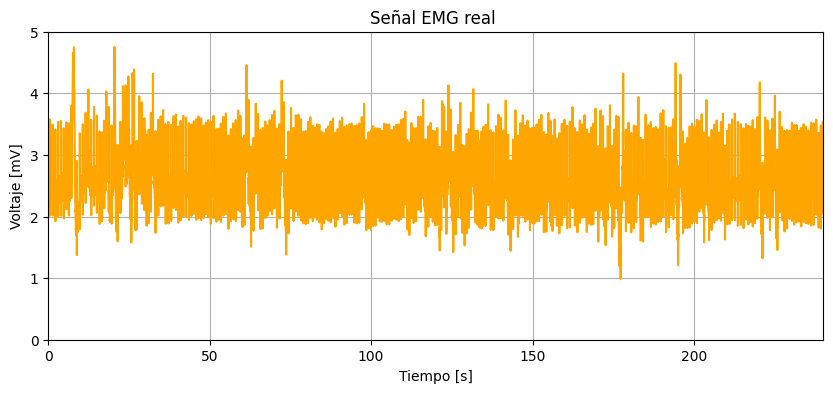

In [9]:
import numpy as np
import matplotlib.pyplot as plt

datos = np.loadtxt('/content/drive/MyDrive/Senal_lab_corazon.10.txt')
print("Dimensiones del archivo:", datos.shape)

# columnas → tiempo y señal
if datos.shape[1] == 2:
    tiempo = datos[:,0]
    senal = datos[:,1]
else:
    # Si solo hay una columna, el tiempo se genera artificialmente
    senal = datos
    fs = 2000 # frecuencia de muestreo (ajusta)
    tiempo = np.arange(len(senal)) / fs

fs = 2000
duracion_deseada = 240
muestras = int(duracion_deseada * fs)

plt.figure(figsize=(10,4))
plt.plot(tiempo[:muestras], senal[:muestras], color='orange')
plt.title('Señal EMG real ')
plt.xlabel('Tiempo [s]')
plt.xlim(0,240)
plt.ylim(0,5)
plt.ylabel('Voltaje [mV]')
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


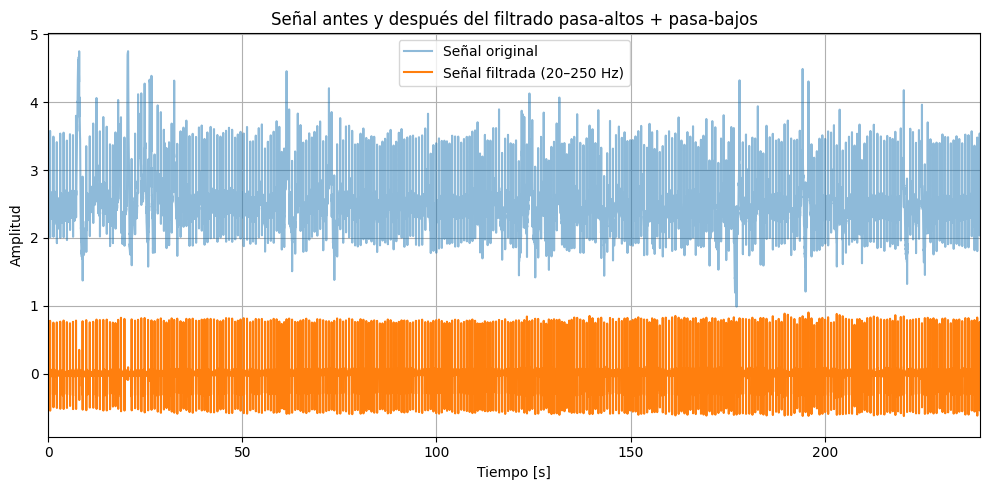

In [15]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

fs = 2000.0
hp_cut = 10
lp_cut = 40.0
order = 4

nyq = fs / 2.0

sos_hp = signal.butter(order, hp_cut / nyq, btype='highpass', output='sos')

sos_lp = signal.butter(order, lp_cut / nyq, btype='lowpass', output='sos')

filtrado_hp = signal.sosfiltfilt(sos_hp, senal)
filtrado_final = signal.sosfiltfilt(sos_lp, filtrado_hp)

plt.figure(figsize=(10,5))
plt.plot(tiempo, senal, label='Señal original', alpha=0.5)
plt.plot(tiempo, filtrado_final, label='Señal filtrada (20–250 Hz)', linewidth=1.5)
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.xlim(0,240)
plt.title('Señal antes y después del filtrado pasa-altos + pasa-bajos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

========== RESULTADOS HRV ==========

SEGMENTO 1 (0–2 min)
RR medio: 755.08 ms
Desviación estándar RR: 72.57 ms

SEGMENTO 2 (2–4 min)
RR medio: 715.08 ms
Desviación estándar RR: 107.24 ms


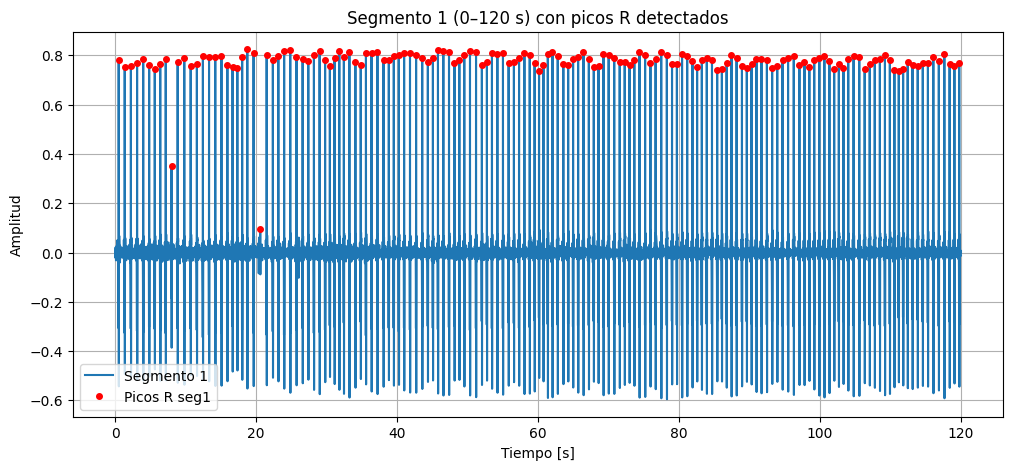

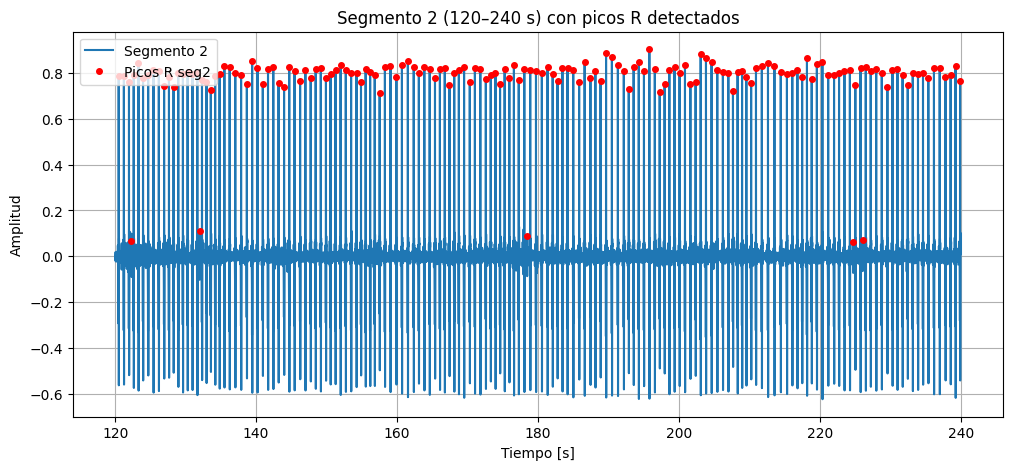

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


fs = 2000
dur_segmento = 120
N_segmento = dur_segmento * fs

senal_filtrada = filtrado_final
t = tiempo

segmento1 = senal_filtrada[0 : N_segmento]
segmento2 = senal_filtrada[N_segmento : 2*N_segmento]

t1 = t[0 : N_segmento]
t2 = t[N_segmento : 2*N_segmento]


def detectar_R(seg, tiempo):

    umbral = np.mean(seg) + 0.5 * np.std(seg)
    prominencia = 0.5 * np.std(seg)

    picos, _ = find_peaks(seg, height=umbral, distance=int(0.25*fs),
                          prominence=prominencia)

    tiempos_R = tiempo[picos]
    return picos, tiempos_R

picos1, tiempos_R1 = detectar_R(segmento1, t1)
picos2, tiempos_R2 = detectar_R(segmento2, t2)



RR1 = np.diff(tiempos_R1) * 1000
RR2 = np.diff(tiempos_R2) * 1000


media_RR1 = np.mean(RR1)
std_RR1   = np.std(RR1)

media_RR2 = np.mean(RR2)
std_RR2   = np.std(RR2)

print("========== RESULTADOS HRV ==========\n")
print("SEGMENTO 1 (0–2 min)")
print(f"RR medio: {media_RR1:.2f} ms")
print(f"Desviación estándar RR: {std_RR1:.2f} ms\n")

print("SEGMENTO 2 (2–4 min)")
print(f"RR medio: {media_RR2:.2f} ms")
print(f"Desviación estándar RR: {std_RR2:.2f} ms")


plt.figure(figsize=(12,5))
plt.plot(t1, segmento1, label="Segmento 1")
plt.plot(t1[picos1], segmento1[picos1], 'ro', markersize=4, label="Picos R seg1")
plt.title("Segmento 1 (0–120 s) con picos R detectados")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12,5))
plt.plot(t2, segmento2, label="Segmento 2")
plt.plot(t2[picos2], segmento2[picos2], 'ro', markersize=4, label="Picos R seg2")
plt.title("Segmento 2 (120–240 s) con picos R detectados")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

**Parte C**

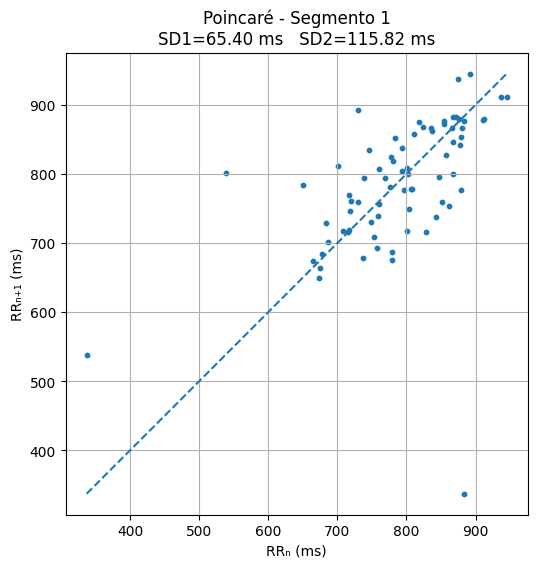

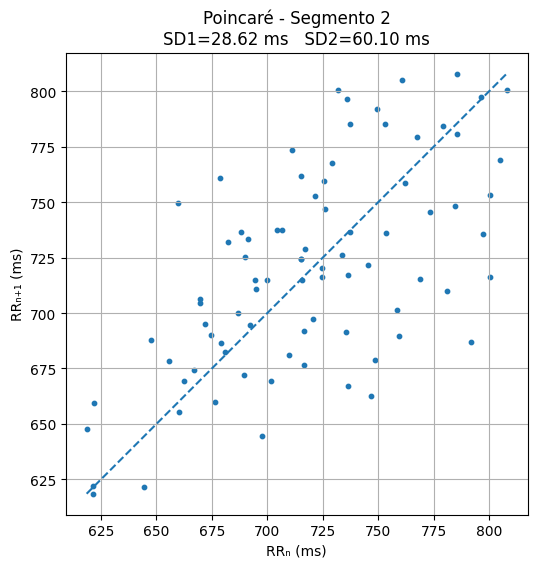

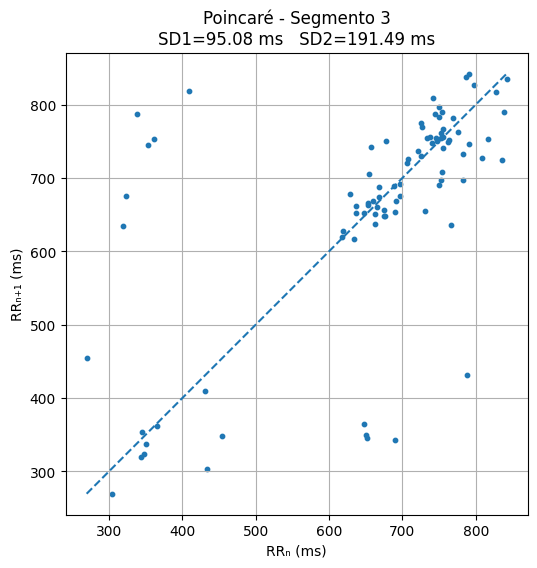

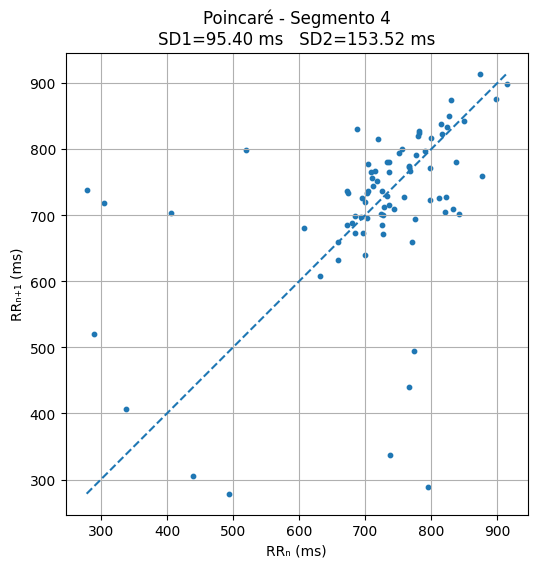

,segmento,SD1,SD2,CVI,CSI
0,1,65.398041,115.821198,3.879353,1.771019
1,2,28.622918,60.096563,3.235564,2.099596
2,3,95.079932,191.493598,4.260243,2.014028
3,4,95.403369,153.518395,4.165724,1.609151


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import math


segment_duration_sec = 60
samples_per_segment = int(segment_duration_sec * fs)
n_segments = int(len(filtrado_final) // samples_per_segment)

min_rr_sec = 0.25
min_distance = int(min_rr_sec * fs)

resultados = []

for seg in range(n_segments):
    start = seg * samples_per_segment
    end = start + samples_per_segment

    segmento = filtrado_final[start:end]
    tiempo_seg = tiempo[start:end]


    umbral = np.mean(segmento) + 0.4*np.std(segmento)
    prominencia = 0.3*np.std(segmento)

    picos, _ = find_peaks(segmento, distance=min_distance,
                          height=umbral, prominence=prominencia)

    t_picos = tiempo_seg[picos]

    if len(t_picos) < 2:
        print(f"Segmento {seg+1}: insuficientes RR.")
        continue

    rr = np.diff(t_picos) * 1000

    rr_n = rr[:-1]
    rr_n1 = rr[1:]

    diff_rr = rr_n1 - rr_n
    var_diff = np.var(diff_rr, ddof=1)
    var_rr = np.var(rr, ddof=1)

    SD1 = np.sqrt(var_diff / 2)
    SD2 = np.sqrt(2 * var_rr - (var_diff / 2))

    # ---- ÍNDICES CVI y CSI ----
    CVI = np.log10(SD1 * SD2)
    CSI = SD2 / SD1

    resultados.append({
        "segmento": seg+1,
        "SD1": SD1,
        "SD2": SD2,
        "CVI": CVI,
        "CSI": CSI
    })

    plt.figure(figsize=(6,6))
    plt.scatter(rr_n, rr_n1, s=10)
    plt.plot([min(rr_n), max(rr_n)], [min(rr_n), max(rr_n)], '--')
    plt.title(f"Poincaré - Segmento {seg+1}\nSD1={SD1:.2f} ms   SD2={SD2:.2f} ms")
    plt.xlabel("RRₙ (ms)")
    plt.ylabel("RRₙ₊₁ (ms)")
    plt.grid(True)
    plt.gca().set_aspect('equal')
    plt.show()

import pandas as pd
df = pd.DataFrame(resultados)
df